# Gender Classification Of Names

#### Using Machine Learning To Detect/Predict Gender of Individuals From their Names

- Sklearn
- Pandas
- Text Extraction


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv('data/names_dataset.csv')

In [3]:
df.head()

,index,name,sex
0,0,Mary,F
1,1,Anna,F
2,2,Emma,F
3,3,Elizabeth,F
4,4,Minnie,F


In [4]:
df.shape

(95025, 3)

In [5]:
df.drop('index', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95025 entries, 0 to 95024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    95025 non-null  object
 1   sex     95025 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [7]:
sex = df['sex'].value_counts()
sex

F    60600
M    34425
Name: sex, dtype: int64

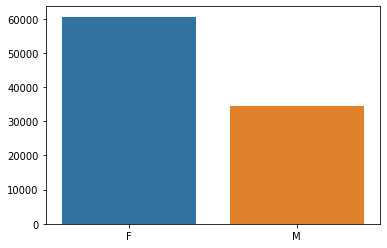

In [8]:
sns.barplot(x=[sex.index[0],sex.index[1]], y=[sex[0],sex[1]]);

#### Encode `sex` into numbers, Female:0 & Male:1

In [9]:
# df['sex'].replace({'F':0, 'M':1}, inpalce=True)
df['sex'] = df['sex'].apply(lambda x: 0 if x=='F' else 1)

In [10]:
df.head()

,name,sex
0,Mary,0
1,Anna,0
2,Emma,0
3,Elizabeth,0
4,Minnie,0


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer()

In [13]:
X, y = df['name'], df['sex']

In [14]:
df_X = cv.fit_transform(X)

In [15]:
print(df_X)

  (0, 59607)	1
  (1, 5972)	1
  (2, 27397)	1
  (3, 26638)	1
  (4, 62314)	1
  (5, 58433)	1
  (6, 34639)	1
  (7, 3360)	1
  (8, 10909)	1
  (9, 75946)	1
  (10, 6206)	1
  (11, 17319)	1
  (12, 26692)	1
  (13, 29870)	1
  (14, 18080)	1
  (15, 59475)	1
  (16, 52670)	1
  (17, 65449)	1
  (18, 31970)	1
  (19, 14486)	1
  (20, 60068)	1
  (21, 56459)	1
  (22, 10959)	1
  (23, 40401)	1
  (24, 31305)	1
  :	:
  (95000, 90488)	1
  (95001, 91505)	1
  (95002, 91535)	1
  (95003, 91826)	1
  (95004, 91833)	1
  (95005, 91920)	1
  (95006, 91999)	1
  (95007, 92081)	1
  (95008, 92626)	1
  (95009, 92629)	1
  (95010, 92651)	1
  (95011, 92840)	1
  (95012, 92908)	1
  (95013, 93144)	1
  (95014, 93237)	1
  (95015, 93402)	1
  (95016, 93420)	1
  (95017, 93841)	1
  (95018, 93862)	1
  (95019, 93914)	1
  (95020, 94102)	1
  (95021, 94463)	1
  (95022, 94578)	1
  (95023, 94915)	1
  (95024, 95019)	1


In [16]:
cv.get_feature_names()

['aaban',
 'aabha',
 'aabid',
 'aabriella',
 'aada',
 'aadam',
 'aadan',
 'aadarsh',
 'aaden',
 'aadesh',
 'aadhav',
 'aadhavan',
 'aadhi',
 'aadhira',
 'aadhvik',
 'aadhya',
 'aadhyan',
 'aadi',
 'aadian',
 'aadil',
 'aadin',
 'aadish',
 'aadison',
 'aadit',
 'aadith',
 'aadithya',
 'aaditri',
 'aaditya',
 'aadiv',
 'aadon',
 'aadrian',
 'aadrika',
 'aadrit',
 'aadvik',
 'aadvika',
 'aadya',
 'aadyn',
 'aafia',
 'aafreen',
 'aagam',
 'aage',
 'aagot',
 'aahaan',
 'aahan',
 'aahana',
 'aahil',
 'aahir',
 'aahliyah',
 'aahna',
 'aahron',
 'aaidan',
 'aaiden',
 'aaidyn',
 'aaila',
 'aailiyah',
 'aailyah',
 'aaima',
 'aaira',
 'aairah',
 'aaisha',
 'aaishah',
 'aaiyana',
 'aaiza',
 'aaja',
 'aajah',
 'aajaylah',
 'aajon',
 'aakanksha',
 'aakarsh',
 'aakash',
 'aakeem',
 'aakilah',
 'aakira',
 'aakiyah',
 'aakriti',
 'aala',
 'aalaiya',
 'aalaiyah',
 'aalana',
 'aalanah',
 'aalani',
 'aalap',
 'aalaya',
 'aalayah',
 'aalayiah',
 'aalayjah',
 'aalayna',
 'aalaysha',
 'aalaysia',
 'aalea',
 

In [17]:
df.sort_values('name').head()

,name,sex
83170,Aaban,1
88709,Aabha,0
75731,Aabid,1
84129,Aabriella,0
94209,Aada,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y,
                                                    train_size=0.75,
                                                    random_state=0)

## Model Building

In [19]:
# To measure time of the training process for each algorithm
from time import time

### Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
tic = time()
nb_clf.fit(X_train, y_train)
toc = time()

In [21]:
# Train set Accuracy
print('Train set Accuracy :', nb_clf.score(X_train, y_train)*100, '%')
# Test set Accuracy 
print('Test set Accuracy :', nb_clf.score(X_test, y_test)*100, '%')
# Time of training
print('Time :', (toc-tic)*1000, 'ms')

Train set Accuracy : 100.0 %
Test set Accuracy : 63.67807383087089 %
Time : 130.2802562713623 ms


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
tic = time()
lr_clf.fit(X_train, y_train)
toc = time()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# Train set Accuracy
print('Train set Accuracy :', lr_clf.score(X_train, y_train)*100, '%')
# Test set Accuracy 
print('Test set Accuracy :', lr_clf.score(X_test, y_test)*100, '%')
# Time of training
print('Time :', (toc-tic)*1000, 'ms')

Train set Accuracy : 63.80423191334119 %
Test set Accuracy : 63.67807383087089 %
Time : 491.89019203186035 ms


***Note:*** I tried **Decision Tree** & **Random Forest** here but they need a lot of time

#### Sample Predicition

In [24]:
# Sample 1
sample_name = ['Mary']
vec = cv.transform(sample_name).toarray()

In [25]:
vec

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
# Female is 0, Male is 1
nb_clf.predict(vec)[0]

0

In [27]:
# Sample 2
sample_name2 = ['Omar']
pred2 = nb_clf.predict(cv.transform(sample_name2))

In [28]:
pred2[0]

1

In [29]:
# Sample 3
sample_name3 = ['Rania','Aya','Ahmed','Abd','Khaled','Khan','Dal']
pred3 = nb_clf.predict(cv.transform(sample_name3))
pred3

array([0, 0, 1, 0, 1, 1, 1], dtype=int64)

#### Gender prediction function

In [30]:
def genderpredictor(name):
    vect = cv.transform([name]).toarray()
    if nb_clf.predict(vect) == 1:
        print('Male')
    else:
        print('Female')

In [31]:
genderpredictor('hanya')

Female


### Using a custom function for feature analysis

By analogy, most female names ends in 'A' or 'E' or has the sound of 'A'

In [32]:
def features(name):
    name = name.lower()
    return {
        'first-letter': name[0],  # First letter
        'first2-letters': name[0:2],  # First 2 letters
        'first3-letters': name[0:3],  # First 3 letters
        'last-letter': name[-1],
        'last2-letters': name[-2:],
        'last3-letters': name[-3:]
    }

---
**Example from docs of `vectorizre()` fuction**

`
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b
`

`
vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4], 2)
==> array([3, 4, 1, 2])
`

like

`
np.array([1, 2, 3]) - 1
==> array([0, 1, 2])
`

---

In [33]:
# Vectorize the features function 
features = np.vectorize(features)
print(features(['Rania','Aya','Ahmed','Abd','Khaled','Dal']))

[{'first-letter': 'r', 'first2-letters': 'ra', 'first3-letters': 'ran', 'last-letter': 'a', 'last2-letters': 'ia', 'last3-letters': 'nia'}
 {'first-letter': 'a', 'first2-letters': 'ay', 'first3-letters': 'aya', 'last-letter': 'a', 'last2-letters': 'ya', 'last3-letters': 'aya'}
 {'first-letter': 'a', 'first2-letters': 'ah', 'first3-letters': 'ahm', 'last-letter': 'd', 'last2-letters': 'ed', 'last3-letters': 'med'}
 {'first-letter': 'a', 'first2-letters': 'ab', 'first3-letters': 'abd', 'last-letter': 'd', 'last2-letters': 'bd', 'last3-letters': 'abd'}
 {'first-letter': 'k', 'first2-letters': 'kh', 'first3-letters': 'kha', 'last-letter': 'd', 'last2-letters': 'ed', 'last3-letters': 'led'}
 {'first-letter': 'd', 'first2-letters': 'da', 'first3-letters': 'dal', 'last-letter': 'l', 'last2-letters': 'al', 'last3-letters': 'dal'}]


In [34]:
# Extract the features of the dataset
names_features = features(X)

In [35]:
from sklearn.feature_extraction import DictVectorizer

----

**what `DictVectorizer` does is**

{'length': 1, 'width': 0, **'height': 2**} => {**'height': 2**, 'length': 1, 'width': 0}  => [2, 1, 0]

{'length': 0, 'width': 1, **'height': 1**} => {**'height': 1**, 'length': 0, 'width': 1}  => [1, 0, 1]

{'length': 3, 'width': 2, **'height': 1**} => {**'height': 1**, 'length': 3, 'width': 2}  => [1, 3, 2]


In [36]:
v = DictVectorizer(sparse=False)
d = [{'length': 1, 'width': 0, 'height': 2},
     {'length': 0, 'width': 1, 'height': 1},
     {'length': 3, 'width': 2, 'height': 1}]
v.fit_transform(d)

array([[2., 1., 0.],
       [1., 0., 1.],
       [1., 3., 2.]])

In [37]:
v.get_feature_names()

['height', 'length', 'width']

----

In [38]:
corpus = features(['Amr', 'Omar'])
dv = DictVectorizer(sparse=False)
transformed = dv.fit_transform(corpus)
print('Without sparse:\n', transformed)
print('\nWith sparse:\n', DictVectorizer(sparse=True).fit_transform(corpus))

Without sparse:
 [[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.]]

With sparse:
   (0, 0)	1.0
  (0, 2)	1.0
  (0, 4)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (1, 1)	1.0
  (1, 3)	1.0
  (1, 5)	1.0
  (1, 6)	1.0
  (1, 7)	1.0
  (1, 10)	1.0


In [39]:
dv.get_feature_names()

['first-letter=a',
 'first-letter=o',
 'first2-letters=am',
 'first2-letters=om',
 'first3-letters=amr',
 'first3-letters=oma',
 'last-letter=r',
 'last2-letters=ar',
 'last2-letters=mr',
 'last3-letters=amr',
 'last3-letters=mar']

check the *features* of each name in `corpus` with the `DictVectorizer`'s `get_feature_names` list, if `True` then **1** else **0**.

In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(names_features, y, train_size=0.75, random_state=0)

In [41]:
X_train2

array([{'first-letter': 'r', 'first2-letters': 'ru', 'first3-letters': 'rud', 'last-letter': 'a', 'last2-letters': 'na', 'last3-letters': 'ina'},
       {'first-letter': 'i', 'first2-letters': 'il', 'first3-letters': 'ili', 'last-letter': 'y', 'last2-letters': 'ny', 'last3-letters': 'nny'},
       {'first-letter': 'b', 'first2-letters': 'bl', 'first3-letters': 'bla', 'last-letter': 'e', 'last2-letters': 'ie', 'last3-letters': 'lie'},
       ...,
       {'first-letter': 's', 'first2-letters': 'sh', 'first3-letters': 'sha', 'last-letter': 'h', 'last2-letters': 'ah', 'last3-letters': 'nah'},
       {'first-letter': 'm', 'first2-letters': 'ma', 'first3-letters': 'mar', 'last-letter': 'i', 'last2-letters': 'ni', 'last3-letters': 'eni'},
       {'first-letter': 's', 'first2-letters': 'se', 'first3-letters': 'sev', 'last-letter': 'n', 'last2-letters': 'en', 'last3-letters': 'ren'}],
      dtype=object)

---

In [42]:
# Prepare train/test data
dv = DictVectorizer() # here, sparse can't be False, cuz fitting 
X_train2 = dv.fit_transform(X_train2)
X_test2 = dv.transform(X_test2)

## Model Building

### Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
tic = time()
nb_clf.fit(X_train2, y_train2)
toc = time()
nb_time = (toc-tic)*1000

In [44]:
# Train set Accuracy
print('Train set Accuracy :', nb_clf.score(X_test2, y_test2)*100, '%')
# Test set Accuracy 
print('Test set Accuracy :', nb_clf.score(X_test2, y_test2)*100, '%')
# Time of training
print('Time :', nb_time, 'ms')

Train set Accuracy : 85.48217367512733 %
Test set Accuracy : 85.48217367512733 %
Time : 16.989946365356445 ms


### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
tic = time()
lr_clf.fit(X_train2, y_train2)
toc = time()
lr_time = (toc-tic)*1000

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
# Train set Accuracy
print('Train set Accuracy :', lr_clf.score(X_train2, y_train2)*100, '%')
# Test set Accuracy 
print('Test set Accuracy :', lr_clf.score(X_test2, y_test2)*100, '%')
# Time of training
print('Time :', lr_time, 'ms')

Train set Accuracy : 89.62227086490431 %
Test set Accuracy : 87.46895651807888 %
Time : 1056.7469596862793 ms


### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
tic = time()
dt_clf.fit(X_train2, y_train2)
toc = time()
dt_time = (toc-tic)*1000

In [48]:
# Train set Accuracy
print('Train set Accuracy :', dt_clf.score(X_train2, y_train2)*100, '%')
# Test set Accuracy 
print('Test set Accuracy :', dt_clf.score(X_test2, y_test2)*100, '%')
# Time of training
print('Time :', dt_time, 'ms')

Train set Accuracy : 98.79469046416344 %
Test set Accuracy : 86.26931009807636 %
Time : 9620.091438293457 ms


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
tic = time()
rf_clf.fit(X_train2, y_train2)
toc = time()
rf_time = (toc-tic)*1000

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
# Train set Accuracy
print('Train set Accuracy :', rf_clf.score(X_train2, y_train2)*100, '%')
# Test set Accuracy 
print('Test set Accuracy :', rf_clf.score(X_test2, y_test2)*100, '%')
# Time of training
print('Time :', rf_time, 'ms')

Train set Accuracy : 98.04259976427008 %
Test set Accuracy : 87.15746937744665 %
Time : 19449.76496696472 ms


#### Sample Prediction

In [51]:
nb_clf.predict(dv.transform(features(['Hania', 'Haila', 'Abd', 'Mostafa'])))

array([0, 0, 1, 0], dtype=int64)

In [52]:
lr_clf.predict(dv.transform(features(['Hania', 'Haila', 'Abd', 'Mostafa'])))

array([0, 0, 1, 1], dtype=int64)

In [53]:
dt_clf.predict(dv.transform(features(['Hania', 'Haila', 'Abd', 'Mostafa'])))

array([0, 0, 1, 0], dtype=int64)

In [54]:
rf_clf.predict(dv.transform(features(['Hania', 'Haila', 'Abd', 'Mostafa'])))

array([0, 0, 1, 1], dtype=int64)

Great progress for *test accuracy* of about **24%** from **63%** to **87%**, specifically for **Logistic Regression** & **Random Forest**.

But let's visualize a comparison for the 4 models *scores* & *times*.

## Model Evaluation

#### Scoring Time

In [55]:
tic = time()
nb_clf_preds = nb_clf.predict(X_train2)
nb_test_time = (time()-tic)*1000
print('NB test time:', nb_test_time, 'ms')

tic = time()
lr_clf_preds = lr_clf.predict(X_train2)
lr_test_time = (time()-tic)*1000
print('LR test time:', lr_test_time, 'ms')

tic = time()
dt_clf_preds = dt_clf.predict(X_train2)
dt_test_time = (time()-tic)*1000
print('DT test time:', dt_test_time, 'ms')

tic = time()
rf_clf_preds = rf_clf.predict(X_train2)
rf_test_time = (time()-tic)*1000
print('RF test time:', rf_test_time, 'ms')

NB test time: 11.0015869140625 ms
LR test time: 3.0078887939453125 ms
DT test time: 60.225486755371094 ms
RF test time: 474.90596771240234 ms


### Visualise Socres (only)

In [56]:
import matplotlib.pyplot as plt

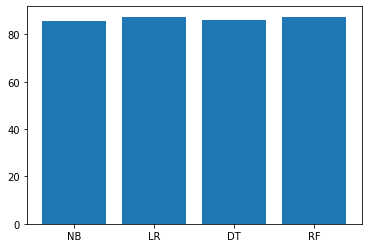

In [57]:
algorithms = ['NB', 'LR', 'DT', 'RF']
scores = np.array([nb_clf.score(X_test2, y_test2), lr_clf.score(X_test2, y_test2),
                   dt_clf.score(X_test2, y_test2), rf_clf.score(X_test2, y_test2)]) * 100
train_times = np.array([nb_time, lr_time, dt_time, rf_time])
test_times = np.array([nb_test_time, lr_test_time, dt_test_time, rf_test_time])
plt.bar(x=algorithms, height=scores);

It's little bit difficult to notice the differences between the scores, 
so we will set the `log` parameter to `True` to normalize the scores

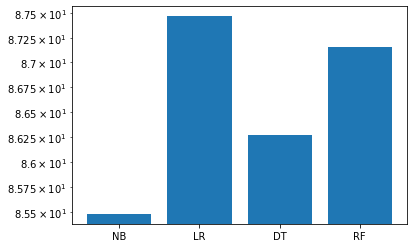

In [58]:
plt.bar(x=algorithms, height=scores, log=True);

Ok, now we can see that **LR** has the best *score* then **RF**, but let's visualize the *time* also by making the times control the bars' widths 

### Visualise Socres & Times

In [59]:
# Normalize the times for ease of visualization
train_times = np.log(train_times)
test_times = np.log(test_times)

# put the data into a DataFrame for ease of use
data = pd.DataFrame({
    'score': scores,
    'train_time': train_times,
    'test_time': test_times
}, index=algorithms)
data

,score,train_time,test_time
NB,85.482174,2.832622,2.398040
LR,87.468957,6.962951,1.101238
DT,86.269310,9.171609,4.098096
RF,87.157469,9.875590,6.163117


#### Visualize Training Time

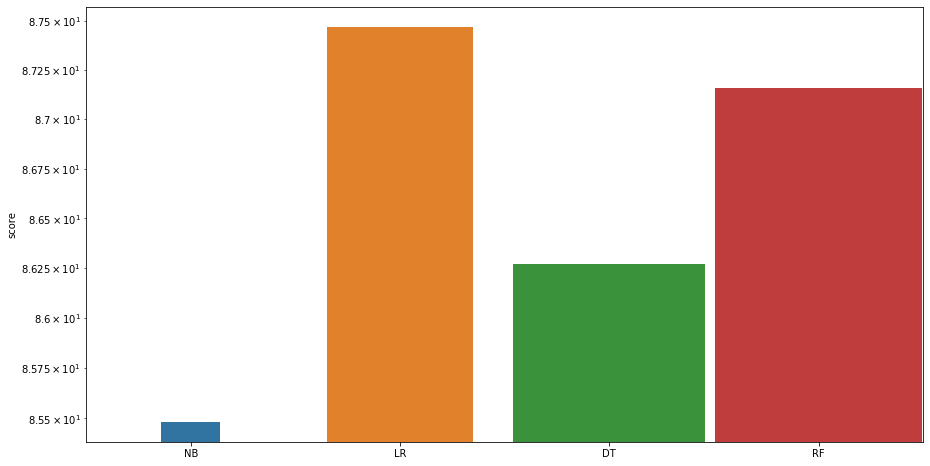

In [60]:
## set figize
_, ax =  plt.subplots(figsize=(15,8))

## Draw Bars
ax = sns.barplot(x=data.index, y='score', data=data, log=True, ax=ax)

## Normalize time since bar width is [0,1]
widths = np.array(data.train_time)/10

## Set widths of Bars
# y-axis: represent accuracy of the algorithm
# bar_width: represent time of the training
for bar, newwidth in zip(ax.patches, widths):
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - newwidth/2.)
    bar.set_width(newwidth)

#### Visualize Testing Time

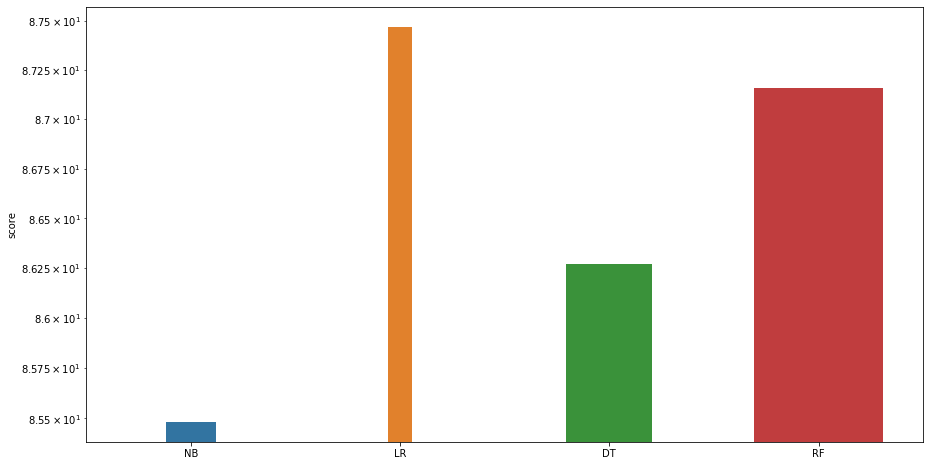

In [61]:
## set figize
_, ax =  plt.subplots(figsize=(15,8))

## Draw Bars
ax = sns.barplot(x=data.index, y='score', data=data, log=True, ax=ax)

## Normalize time since bar width is [0,1]
widths = np.array(data.test_time)/10

## Set widths of Bars
# y-axis: represent accuracy of the algorithm
# bar_width: represent time of the training
for bar, newwidth in zip(ax.patches, widths):
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - newwidth/2.)
    bar.set_width(newwidth)

We can see that **LR** achieved both the best *accuracy* & *time* (test).

Now let's save our model for future use.

### Saving Our Model

We can save our model by several mothods, ex:

- `joblib` from `sklearn.externals`
- `pickle`

then `.dump(model, destination)` to **save** the model, or `.load(model, destination)` to **load** a model.

You can read more about when to use each one of them from [here](https://stackoverflow.com/questions/12615525/what-are-the-different-use-cases-of-joblib-versus-pickle)

![joblib vs pickle](joblib%20vs%20pickle.png)

#### Save Logistic Regression Model

In [62]:
from sklearn.externals import joblib   # import pickle
# save the model
joblib.dump(lr_clf, 'models/logregmodel.pkl')   # pickle.dump(_,_)

# load the model
model = joblib.load('models/logregmodel.pkl')   # pickle.load()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
model.predict(dv.transform(features(['jack'])))

array([1], dtype=int64)

#### Make a Pipeline

To make it easy for prediction to the application, we will merge the `DictVectorizer` with the `LogisticRegression` classifier into a pipeline.

In [65]:
from sklearn.pipeline import Pipeline

vec_clf = Pipeline([('vectorizer', dv), ('lr', lr_clf)])
# vec_clf.fit(X_train2, y_train2)
joblib.dump(vec_clf, 'models/vectorizer_and_lr.pkl') 

['models/vectorizer_and_lr.pkl']

In [66]:
model = joblib.load('models/vectorizer_and_lr.pkl')

In [67]:
model.predict(features(['jack']))

array([1], dtype=int64)